In [1]:
import pandas as pd
from functions.analysis_and_plots import (preprocessing, train_test_split, plot_train_test_data,
seasonal_decompose_plot, exp_smothing_model, exponential_smothing_plot, rms_error_calc)

In [23]:
df = pd.read_csv('zahedan.csv')

In [24]:
df.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,Temp
0,1970,7.79,11.48,12.86,21.20,25.75,28.10,28.25,28.49,22.69,18.80,13.46,8.86,10.19,19.94,28.28,18.32,19.18
1,1971,4.75,10.35,15.20,20.78,25.83,28.06,28.02,26.47,20.32,16.13,13.46,10.23,7.99,20.60,27.52,16.64,18.19
2,1972,6.63,3.01,13.99,17.78,22.94,27.28,26.55,23.82,22.20,17.63,13.88,6.37,6.62,18.24,25.88,17.90,17.16
3,1973,1.51,12.23,16.06,21.64,25.58,29.19,29.04,26.88,22.39,17.08,12.52,6.75,6.70,21.09,28.37,17.33,18.37
4,1974,5.99,6.42,15.52,20.90,23.93,27.32,28.38,25.47,23.02,13.96,11.70,8.10,6.39,20.12,27.06,16.23,17.45


In [7]:
df_main = preprocessing(df)

In [8]:
df_main.head()

,Date,Temp
0,1970-1,7.79
1,1970-2,11.48
2,1970-3,12.86
3,1970-4,21.20
4,1970-5,25.75


In [9]:
train_data, test_data = train_test_split(df_main, split_index=400)

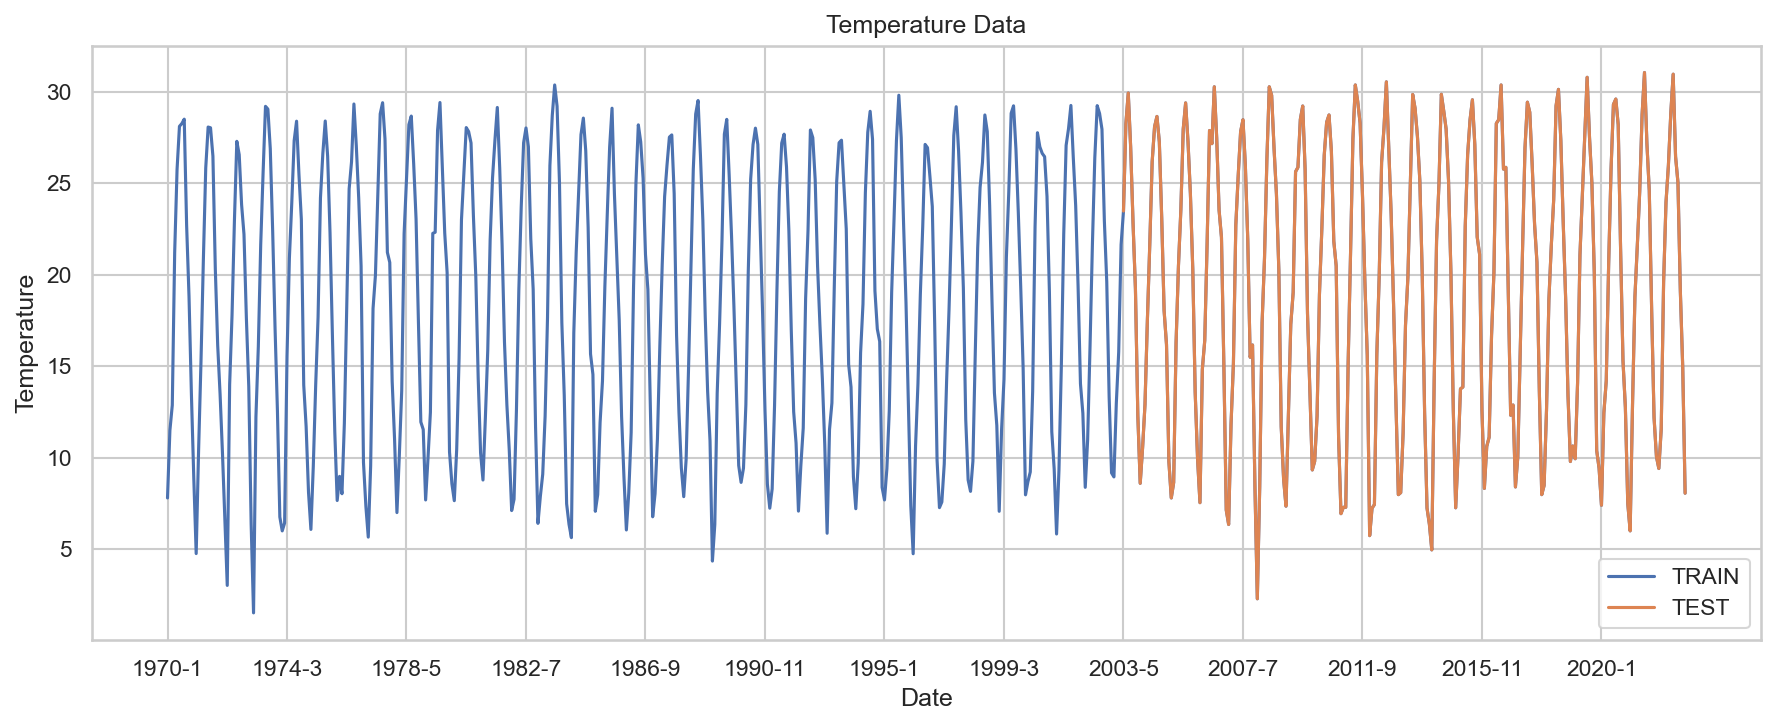

In [10]:
plot_train_test_data(train_data=train_data, test_data=test_data)

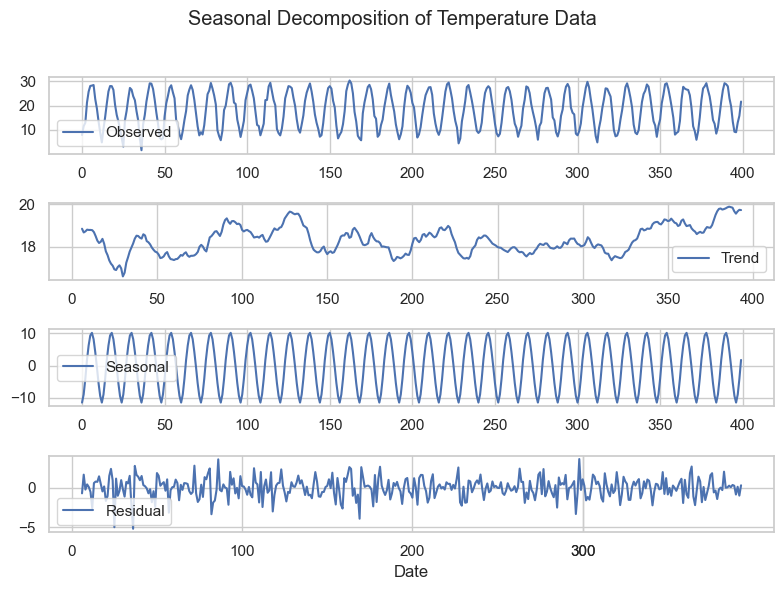

In [11]:
seasonal_decompose_plot(train_data)

**first: Single explonential smoohting model fit**

In [12]:
preds = exp_smothing_model(train_data, test_data, model='single')

C:\Users\Amir\.conda\envs\weather\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


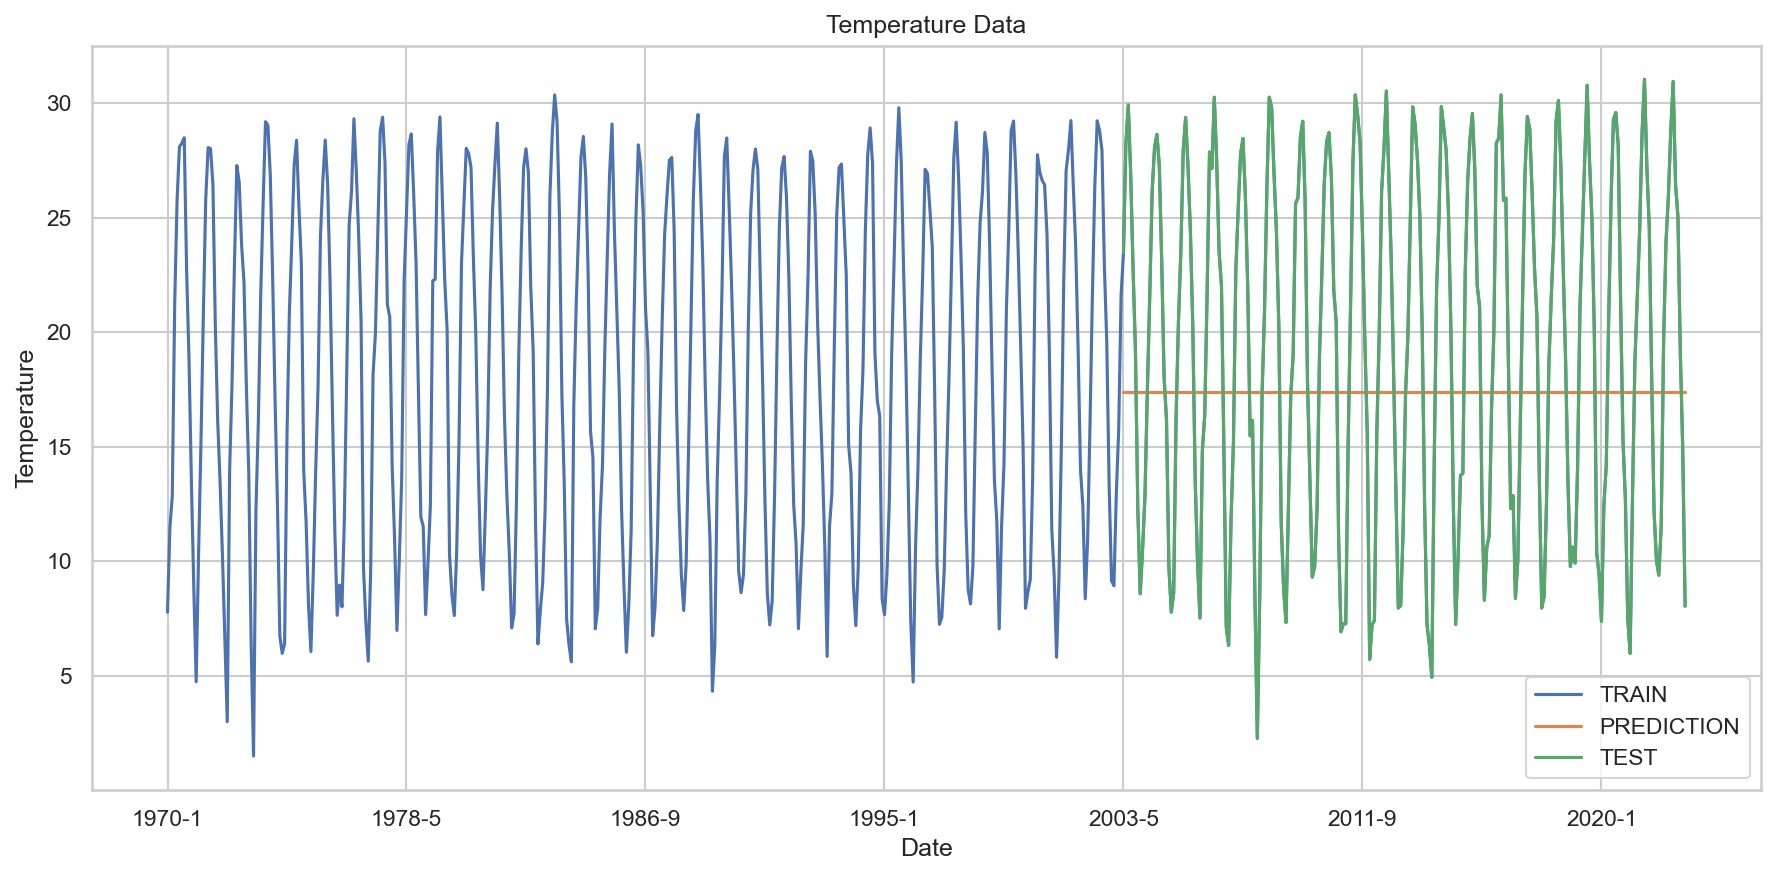

In [13]:
exponential_smothing_plot(train_data, test_data, preds)

**calculat root mean square error**

In [14]:
single_rms = rms_error_calc(test_data, preds)
print("Root Mean Square Error of Single method is:", single_rms)

Root Mean Square Error of Single method is: 7.957547632721683


**Double explonential smoohting model fit**

In [15]:
preds_double = exp_smothing_model(train_data, test_data, model='double')

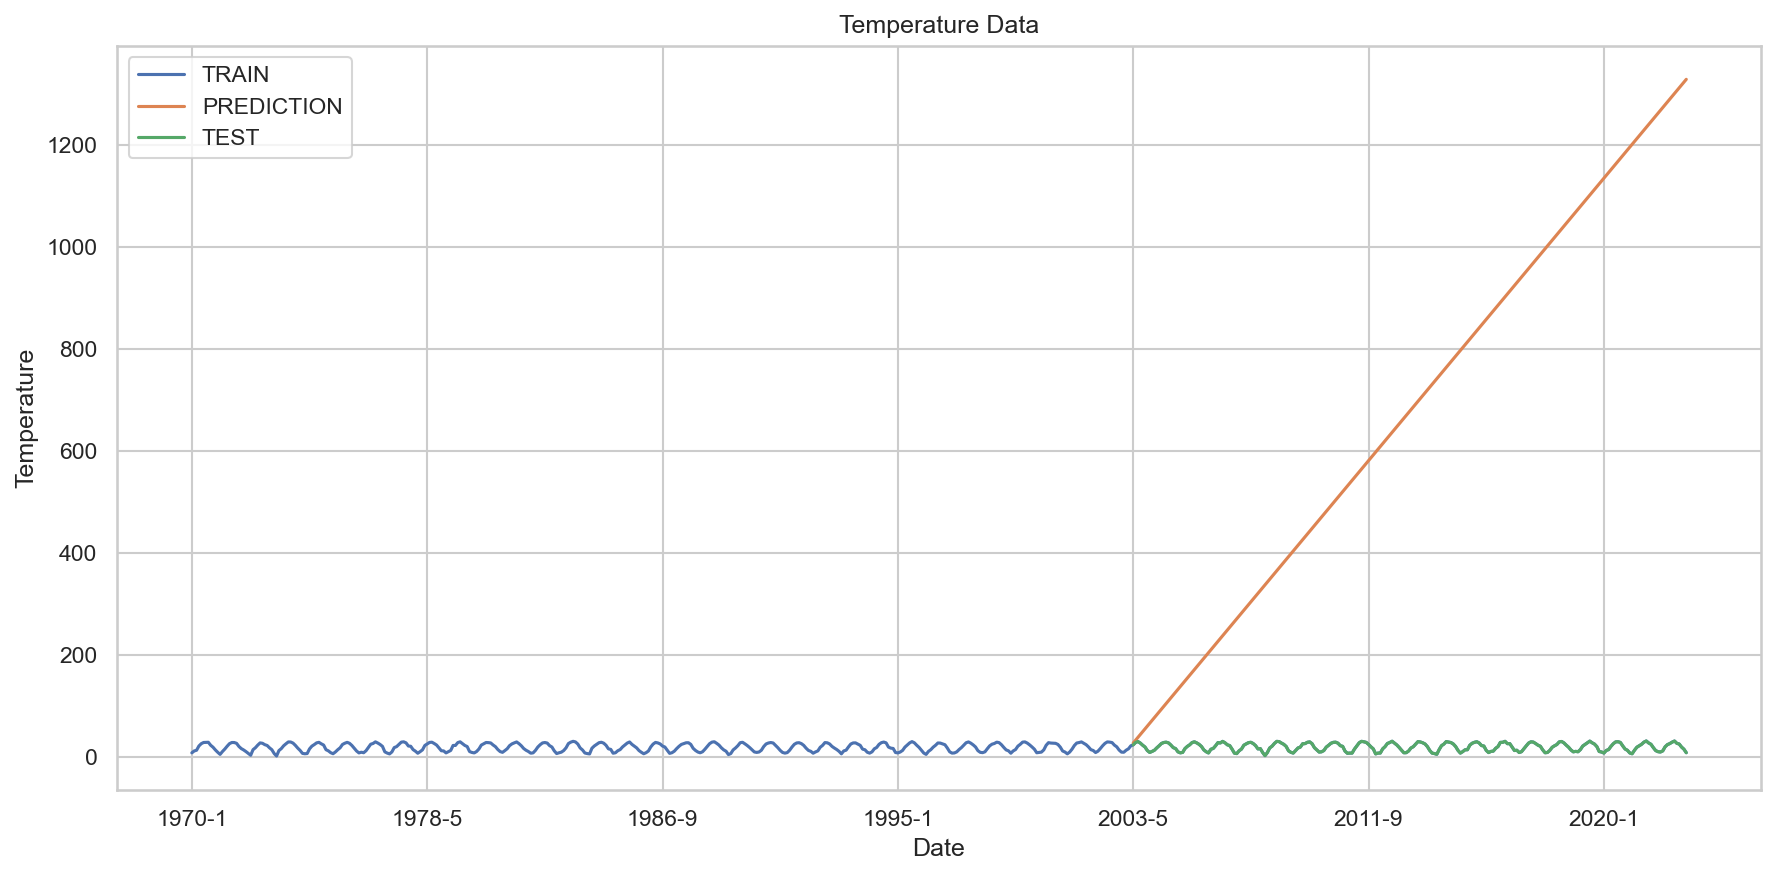

In [16]:
exponential_smothing_plot(train_data, test_data, preds_double)

In [17]:
double_rms = rms_error_calc(test_data, preds_double)
print(" Root Mean Square Error of double exponential method is:", double_rms)

 Root Mean Square Error of double exponential method is: 758.9183731551395


**Double explonential smoohting model fit**

In [18]:
preds_triple = exp_smothing_model(train_data, test_data, model='triple')

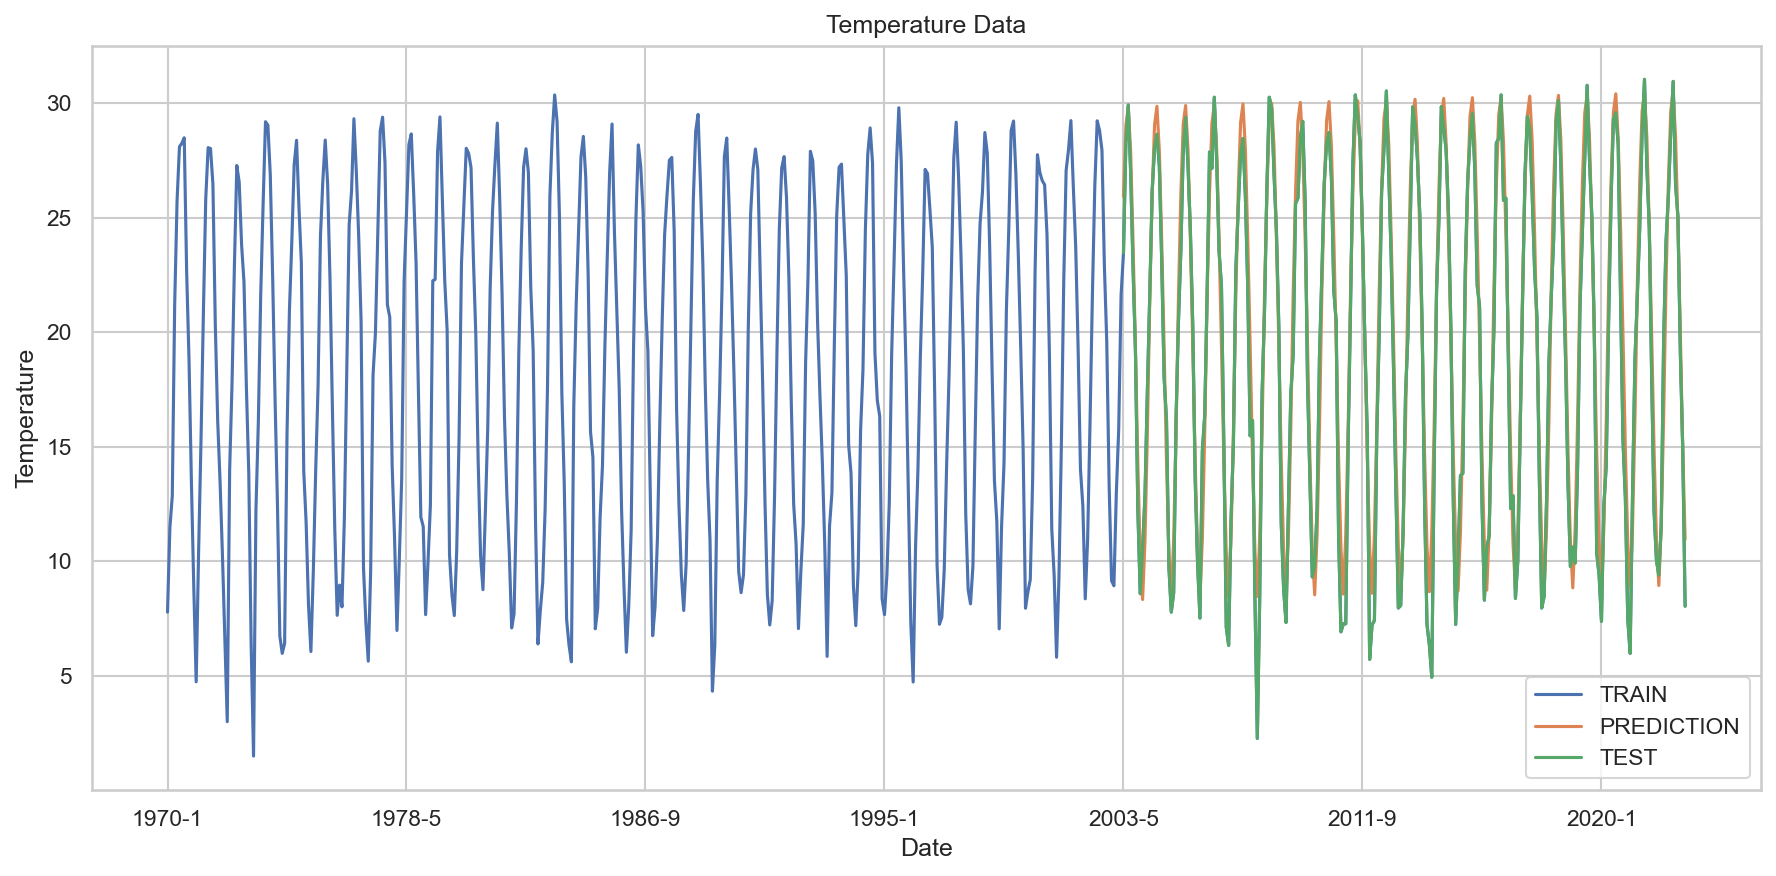

In [19]:
exponential_smothing_plot(train_data, test_data, preds_triple)

In [20]:
triple_rms = rms_error_calc(test_data, preds_triple)
print(" Root Mean Square Error of triple exponential method is:", triple_rms)

 Root Mean Square Error of triple exponential method is: 1.7682948825603209
